In [1]:
import pandas as pd

In [6]:
df = pd.read_csv(r"D:\Placements\Data Analyst\Projects\Used Car Analysis\cardekho_dataset.csv\cardekho_dataset.csv")

In [7]:
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [8]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


DATA CLEANING

In [10]:
missing_values = df.isnull().sum()
print("Missing values per column : 'n",missing_values)

Missing values per column : 'n Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64


In [11]:
df.rename(columns = {"Unnamed: 0":"id"}, inplace = True)

In [ ]:
df.head()

DATA EXPLORATION

In [15]:
categorical_cols = df[["car_name", "brand", "model", "seller_type","fuel_type", "transmission_type"]].columns

for col in categorical_cols:
    print(f"Values count for '{col}' : ")
    display(df[col].value_counts())
    print("\n")

Values count for 'car_name' : 


car_name
Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
                     ... 
Mercedes-AMG C          1
Tata Altroz             1
Ferrari GTC4Lusso       1
Hyundai Aura            1
Force Gurkha            1
Name: count, Length: 121, dtype: int64



Values count for 'brand' : 


brand
Maruti           4992
Hyundai          2982
Honda            1485
Mahindra         1011
Toyota            793
Ford              790
Volkswagen        620
Renault           536
BMW               439
Tata              430
Mercedes-Benz     337
Skoda             334
Audi              192
Datsun            170
Jaguar             59
Land Rover         51
Jeep               41
Kia                32
Porsche            21
Volvo              20
MG                 19
Mini               17
Nissan             11
Lexus              10
Isuzu               8
Bentley             3
Maserati            2
ISUZU               2
Ferrari             1
Mercedes-AMG        1
Rolls-Royce         1
Force               1
Name: count, dtype: int64



Values count for 'model' : 


model
i20            906
Swift Dzire    890
Swift          781
Alto           778
City           757
              ... 
Ghibli           1
Altroz           1
GTC4Lusso        1
Aura             1
Gurkha           1
Name: count, Length: 120, dtype: int64



Values count for 'seller_type' : 


seller_type
Dealer              9539
Individual          5699
Trustmark Dealer     173
Name: count, dtype: int64



Values count for 'fuel_type' : 


fuel_type
Petrol      7643
Diesel      7419
CNG          301
LPG           44
Electric       4
Name: count, dtype: int64



Values count for 'transmission_type' : 


transmission_type
Manual       12225
Automatic     3186
Name: count, dtype: int64

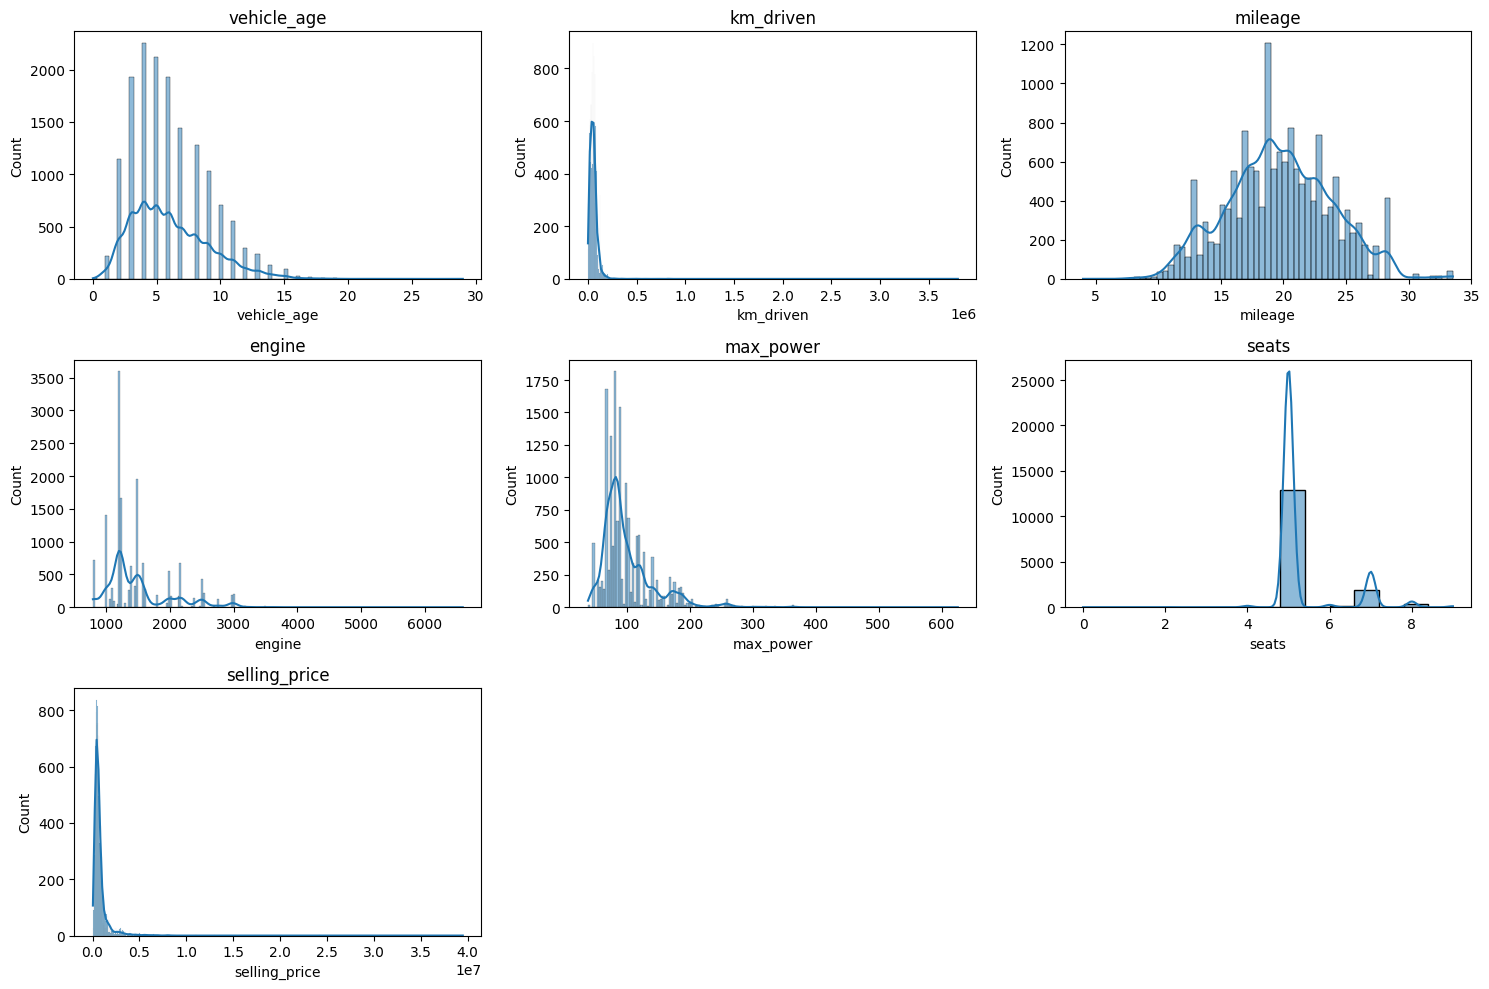

In [16]:
#Univariate Analysis
# 1. Histogram(Distribution)
import matplotlib.pyplot as plt
import seaborn as sns

#Numerical Analysis and exploration
numerical_cols = ['vehicle_age','km_driven','mileage','engine','max_power', 'seats','selling_price']
plt.figure(figsize = (15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3,3, i+1)
    sns.histplot(df[col], kde = True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [19]:
df.describe()

,id,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


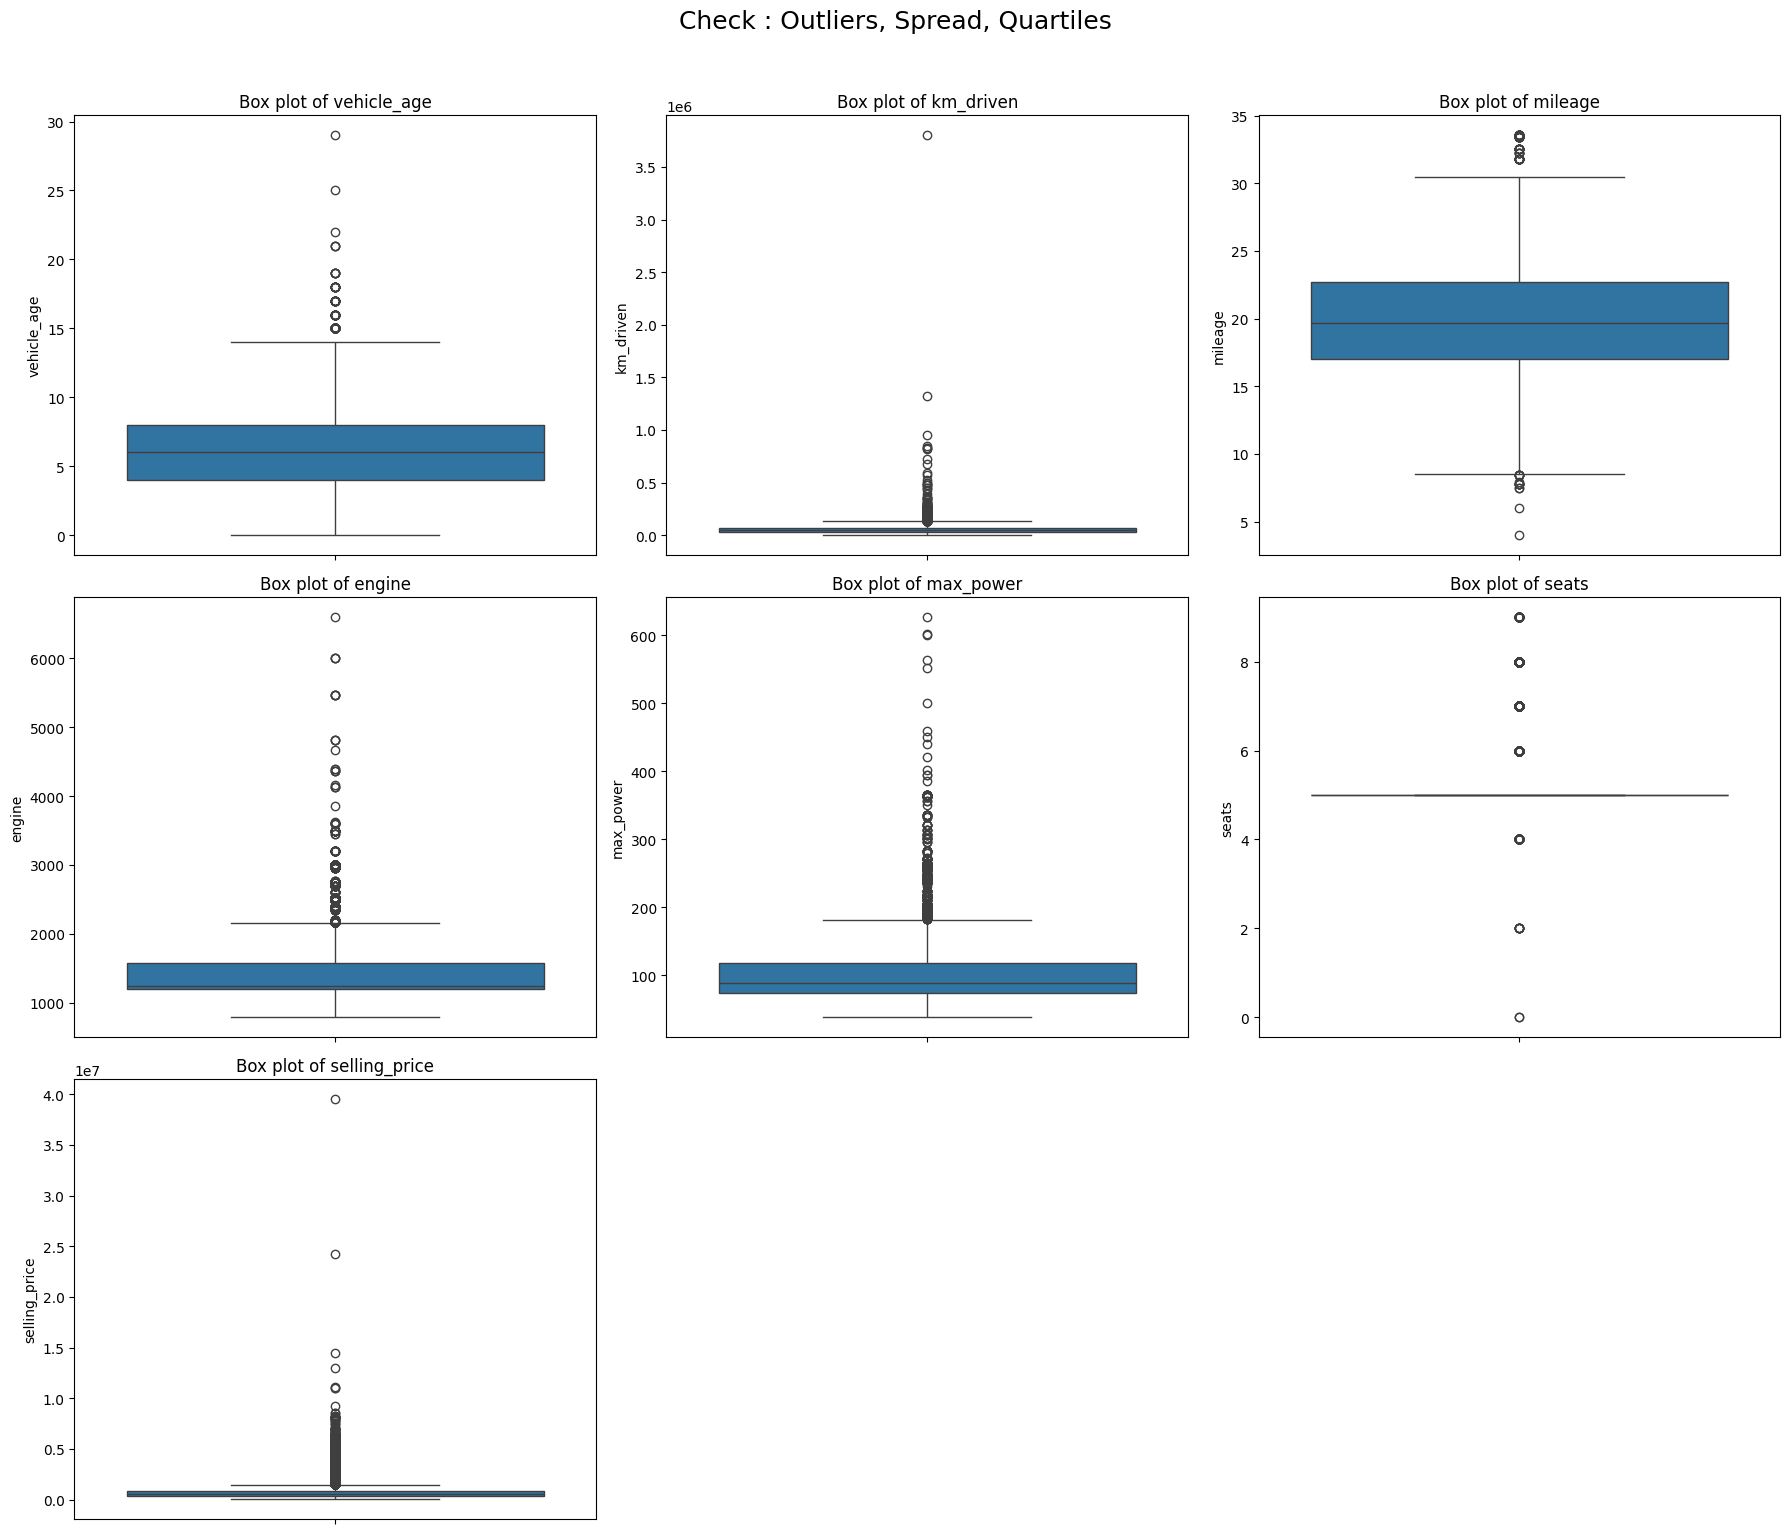

In [21]:
# Check : Outliers, Spreads, Quartiles
plt.figure(figsize = (18,15))
plt.suptitle("Check : Outliers, Spread, Quartiles", fontsize = 18, y = 1.02)
for i, col in enumerate(numerical_cols):
    plt.subplot(3,3,i + 1)
    sns.boxplot(y = df[col])
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()


Displaying Density Plots (KDE)...


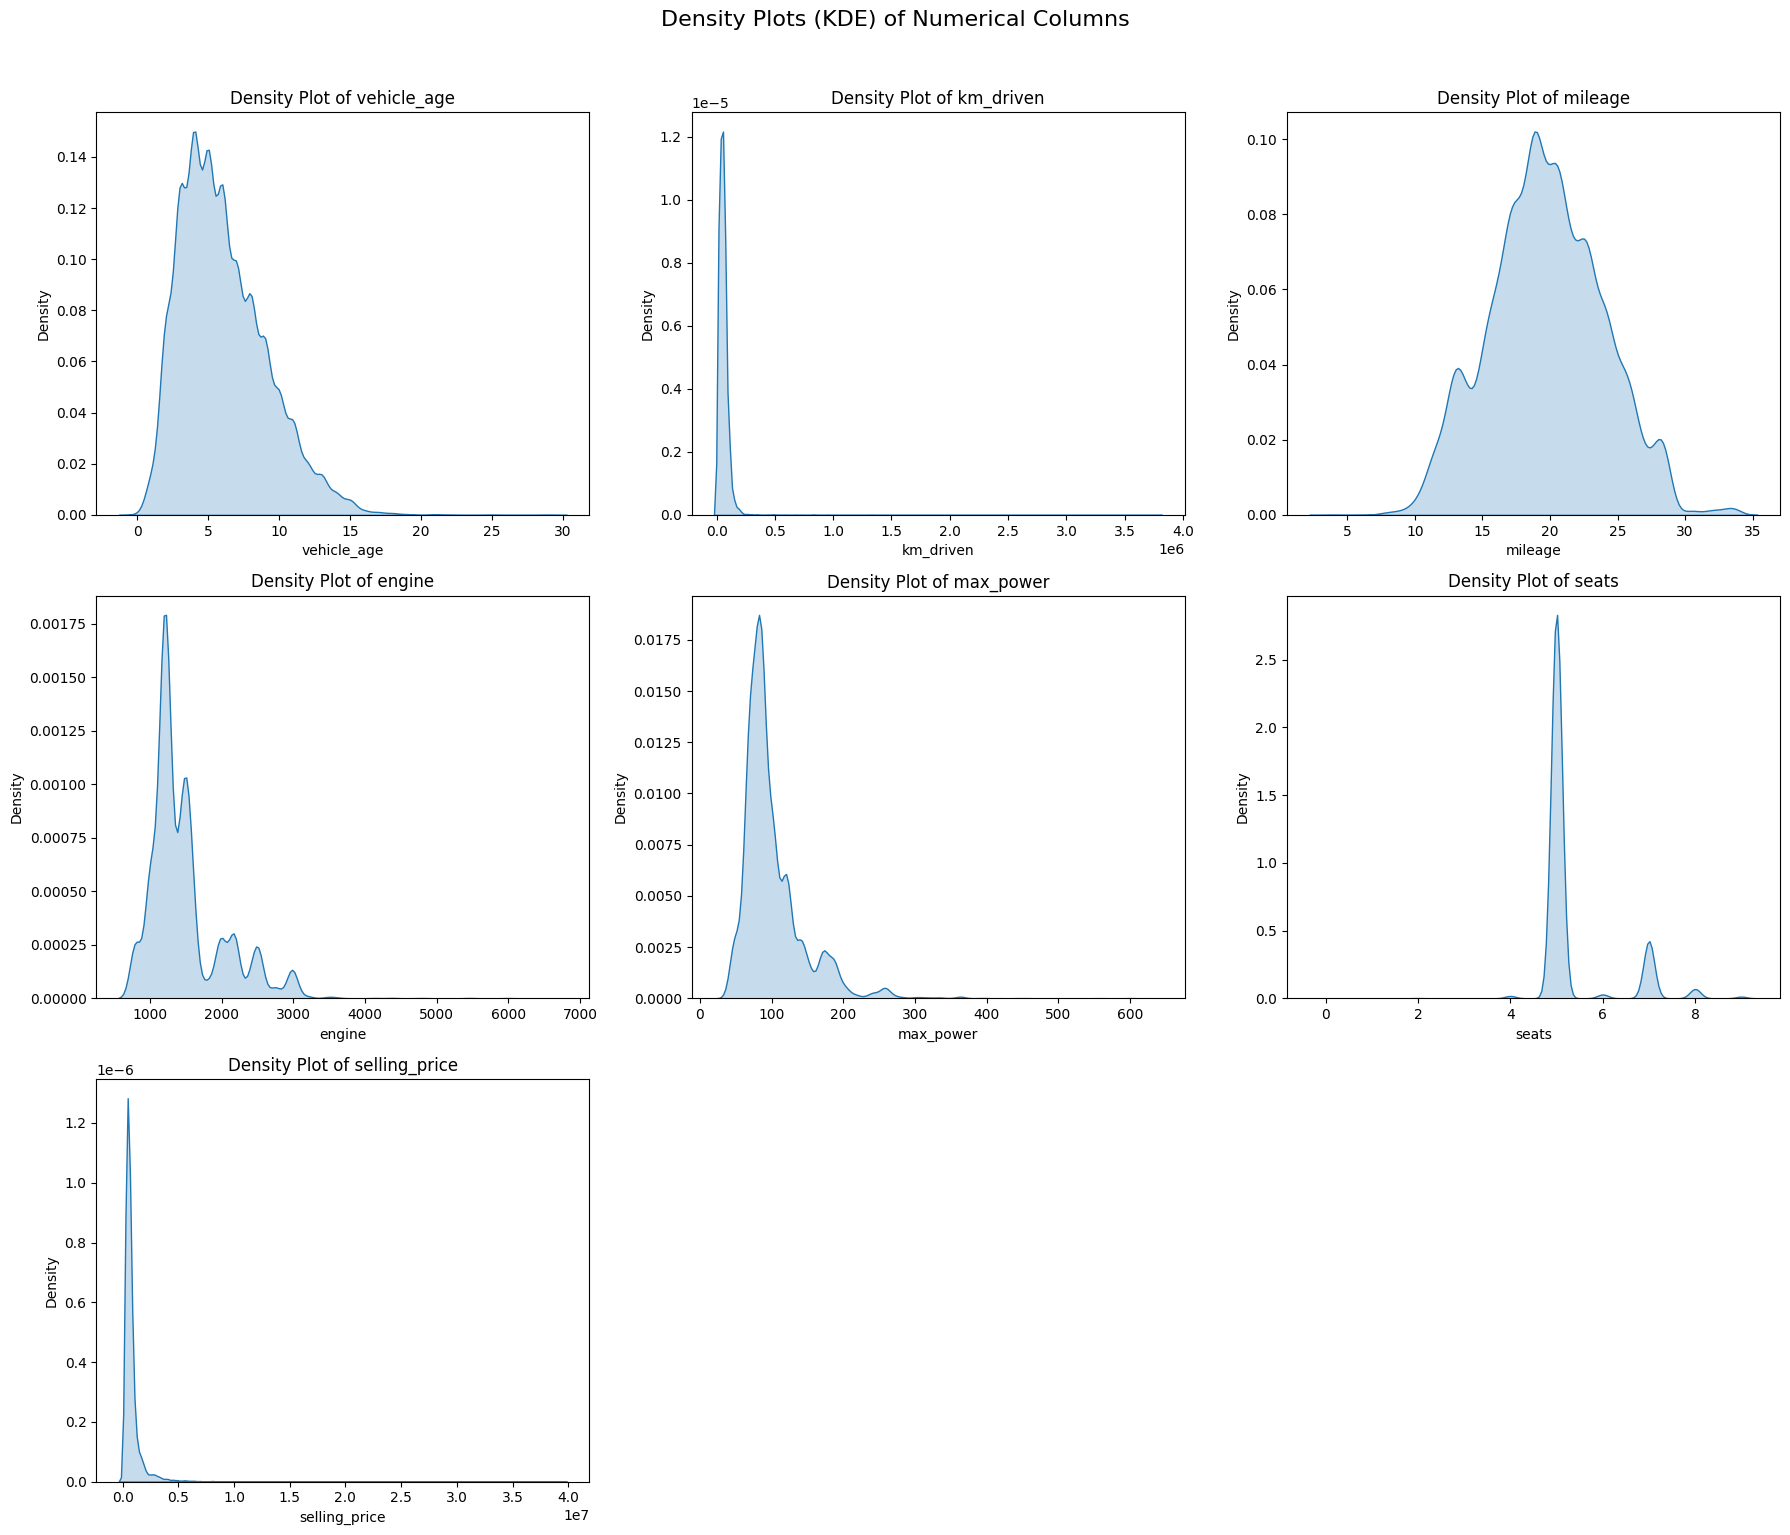

In [22]:
# 3. Density Plots (Smoothed Distribution)
print("\nDisplaying Density Plots (KDE)...")
plt.figure(figsize=(18, 15))
plt.suptitle("Density Plots (KDE) of Numerical Columns", fontsize=16, y=1.02)
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.kdeplot(df[col], fill=True) # Kernel Density Estimate plot with fill
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

In [23]:
# --- Statistical Univariate Analysis ---

print("\n--- Calculating Descriptive Statistics ---")

# Create a dictionary to store the results
stats_summary = {}

for col in numerical_cols:
    # Check if column exists and is numeric before calculating
    if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
        # Calculate mode - mode() returns a Series, handle potential multiple modes
        mode_val = df[col].mode()
        mode_str = ', '.join(map(str, mode_val.tolist())) if not mode_val.empty else 'N/A'

        stats_summary[col] = {
            'Mean': df[col].mean(),
            'Median': df[col].median(),
            'Mode': mode_str, # Store mode as string
            'Std Dev': df[col].std(),
            'Variance': df[col].var(),
            'Min': df[col].min(),
            '25th Percentile (Q1)': df[col].quantile(0.25),
            '50th Percentile (Median)': df[col].quantile(0.50),
            '75th Percentile (Q3)': df[col].quantile(0.75),
            'Max': df[col].max(),
            'IQR (Q3-Q1)': df[col].quantile(0.75) - df[col].quantile(0.25),
            'Skewness': df[col].skew(),
            'Kurtosis': df[col].kurt() # Fisher's definition (normal=0)
        }
    else:
        print(f"Warning: Column '{col}' not found or not numeric. Skipping statistics.")

# Convert the summary dictionary to a DataFrame for nice display
stats_df = pd.DataFrame(stats_summary)
# Optionally, print stats column by column if preferred
print("\n--- Detailed Statistics by Column ---")
for col, stats in stats_summary.items():
    print(f"\nStatistics for '{col}':")
    for stat_name, stat_value in stats.items():
        # Format floats nicely, handle mode string
         if isinstance(stat_value, (int, float)):
             print(f"  {stat_name}: {stat_value:.4f}")
         else:
             print(f"  {stat_name}: {stat_value}") 


--- Calculating Descriptive Statistics ---

--- Detailed Statistics by Column ---

Statistics for 'vehicle_age':
  Mean: 6.0363
  Median: 6.0000
  Mode: 4
  Std Dev: 3.0133
  Variance: 9.0799
  Min: 0
  25th Percentile (Q1): 4.0000
  50th Percentile (Median): 6.0000
  75th Percentile (Q3): 8.0000
  Max: 29
  IQR (Q3-Q1): 4.0000
  Skewness: 0.8337
  Kurtosis: 0.7601

Statistics for 'km_driven':
  Mean: 55616.4806
  Median: 50000.0000
  Mode: 50000
  Std Dev: 51618.5484
  Variance: 2664474541.1727
  Min: 100
  25th Percentile (Q1): 30000.0000
  50th Percentile (Median): 50000.0000
  75th Percentile (Q3): 70000.0000
  Max: 3800000
  IQR (Q3-Q1): 40000.0000
  Skewness: 28.1727
  Kurtosis: 1846.5268

Statistics for 'mileage':
  Mean: 19.7012
  Median: 19.6700
  Mode: 18.9
  Std Dev: 4.1713
  Variance: 17.3994
  Min: 4.0000
  25th Percentile (Q1): 17.0000
  50th Percentile (Median): 19.6700
  75th Percentile (Q3): 22.7000
  Max: 33.5400
  IQR (Q3-Q1): 5.7000
  Skewness: 0.1050
  Kurtosis: -

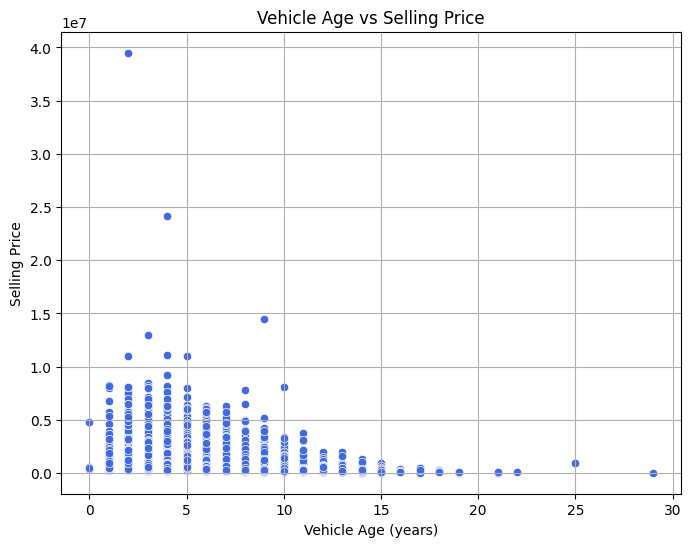

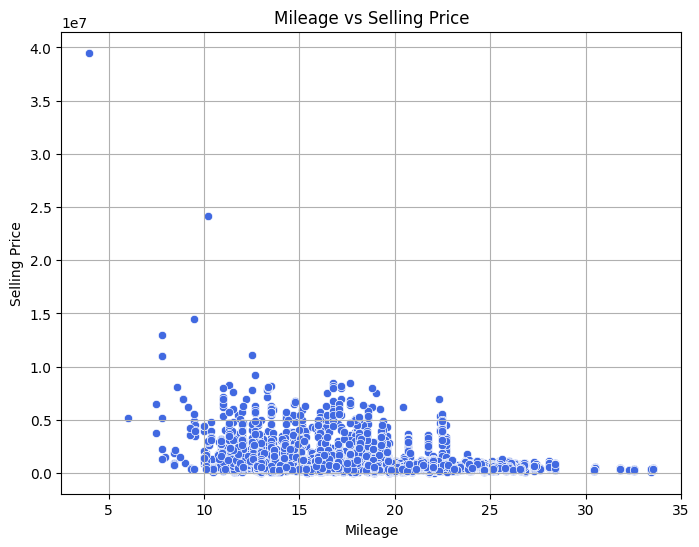

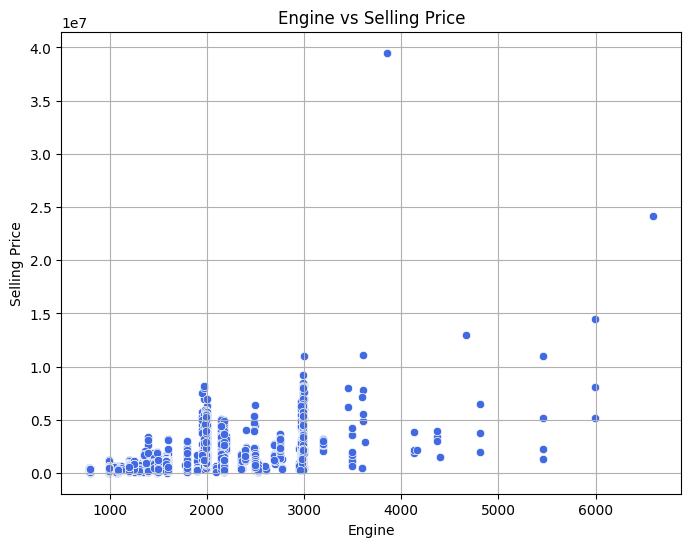

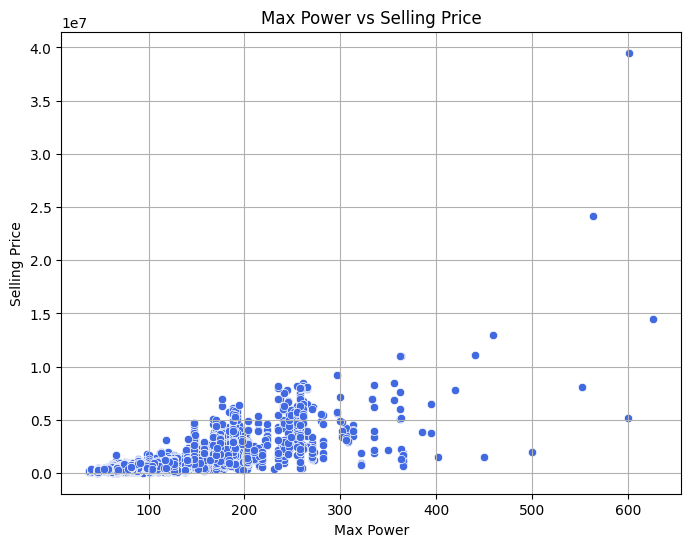

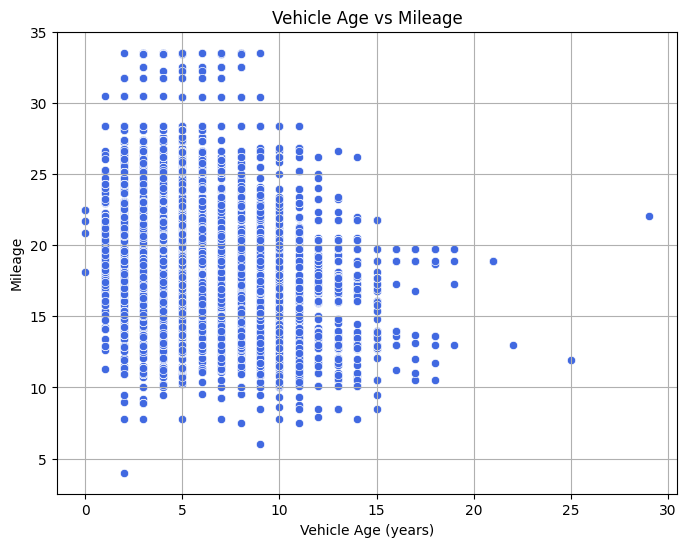

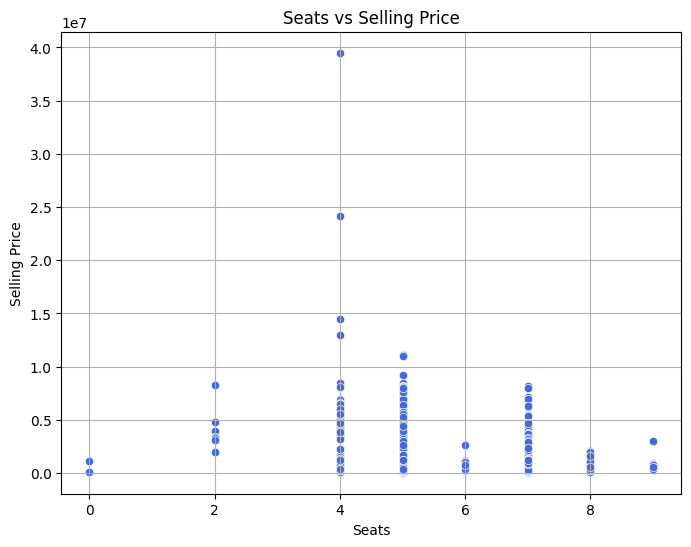

In [27]:
#Bivariate Analysis
#Numerical vs Numerical
#1. Vehicle Age vs Selling price
plt.figure(figsize=(8,6))
sns.scatterplot(x='vehicle_age', y='selling_price', data=df, color='royalblue')
plt.title('Vehicle Age vs Selling Price')
plt.xlabel('Vehicle Age (years)')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

#2. Mileage vs Selling price
plt.figure(figsize=(8,6))
sns.scatterplot(x='mileage', y='selling_price', data=df, color='royalblue')
plt.title('Mileage vs Selling Price')
plt.xlabel('Mileage')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

#3. Engine vs Selling price
plt.figure(figsize=(8,6))
sns.scatterplot(x='engine', y='selling_price', data=df, color='royalblue')
plt.title('Engine vs Selling Price')
plt.xlabel('Engine')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

#4. Max Power vs Selling price
plt.figure(figsize=(8,6))
sns.scatterplot(x='max_power', y='selling_price', data=df, color='royalblue')
plt.title('Max Power vs Selling Price')
plt.xlabel('Max Power')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

#5. Vehicle Age vs Mileage
plt.figure(figsize=(8,6))
sns.scatterplot(x='vehicle_age', y='mileage', data=df, color='royalblue')
plt.title('Vehicle Age vs Mileage')
plt.xlabel('Vehicle Age (years)')
plt.ylabel('Mileage')
plt.grid(True)
plt.show()

#6. Seats vs Selling price
plt.figure(figsize=(8,6))
sns.scatterplot(x='seats', y='selling_price', data=df, color='royalblue')
plt.title('Seats vs Selling Price')
plt.xlabel('Seats')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()


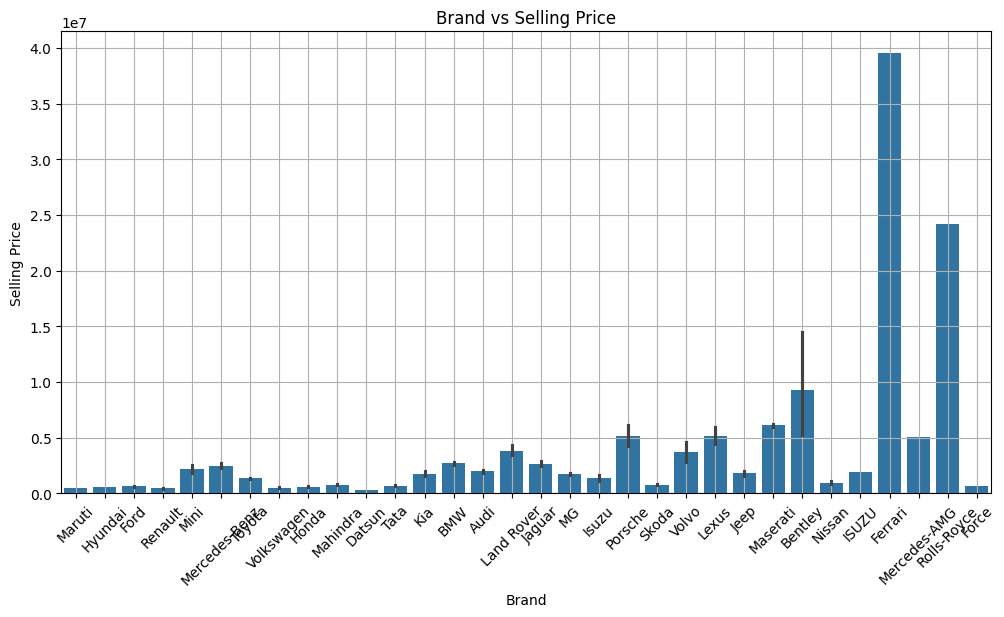

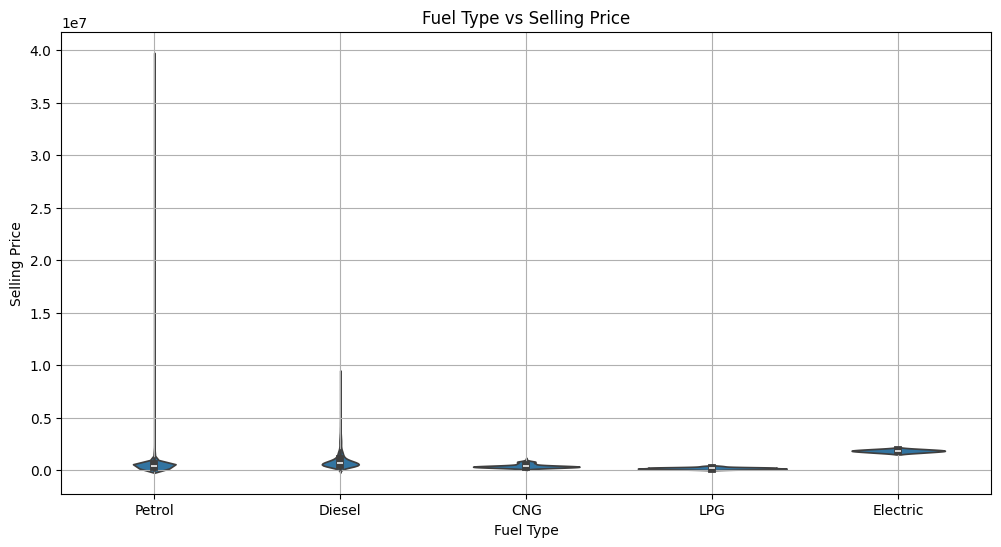

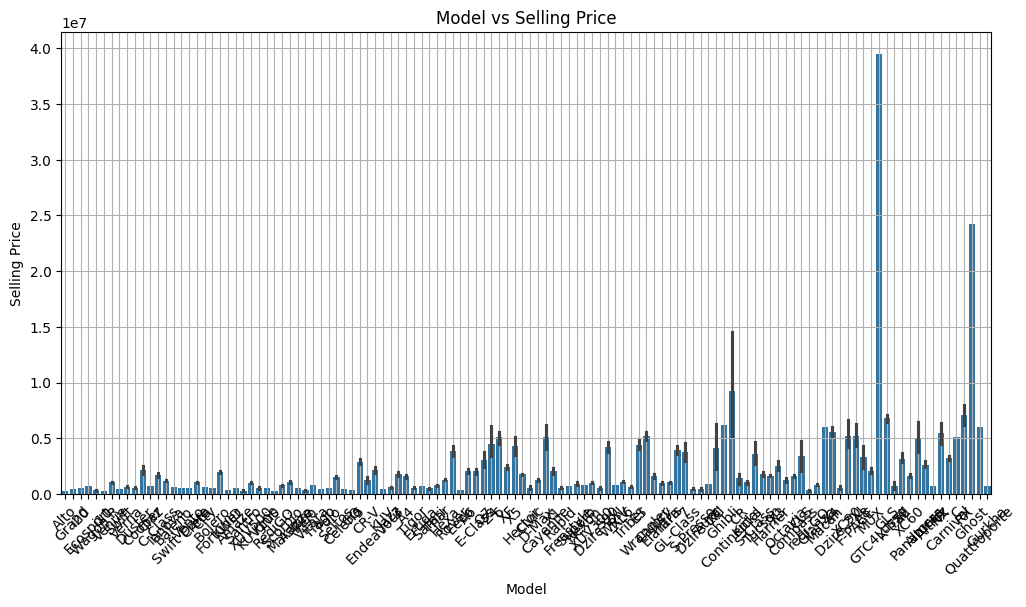

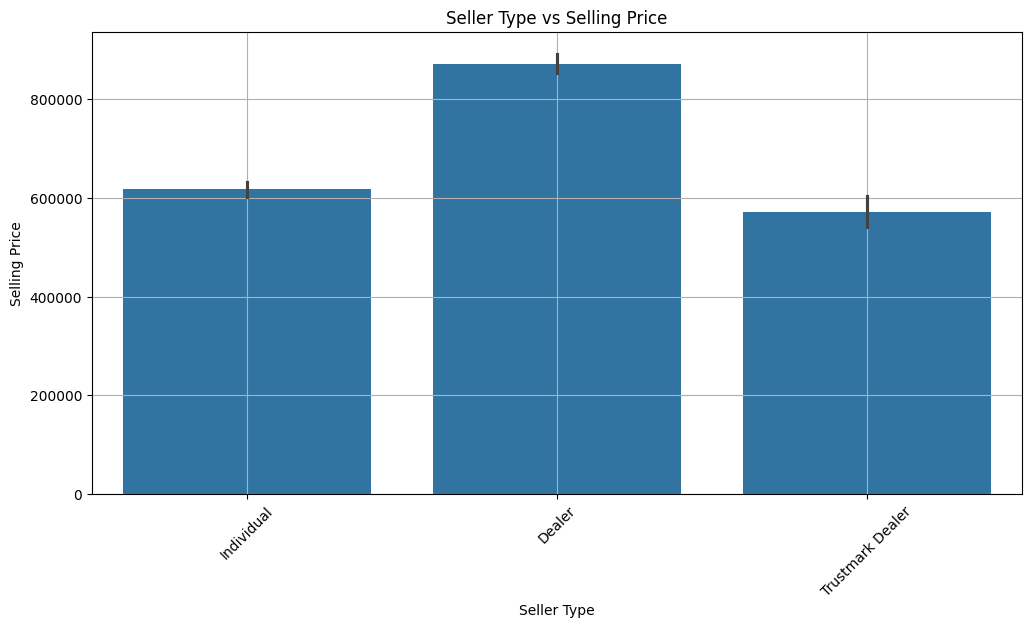

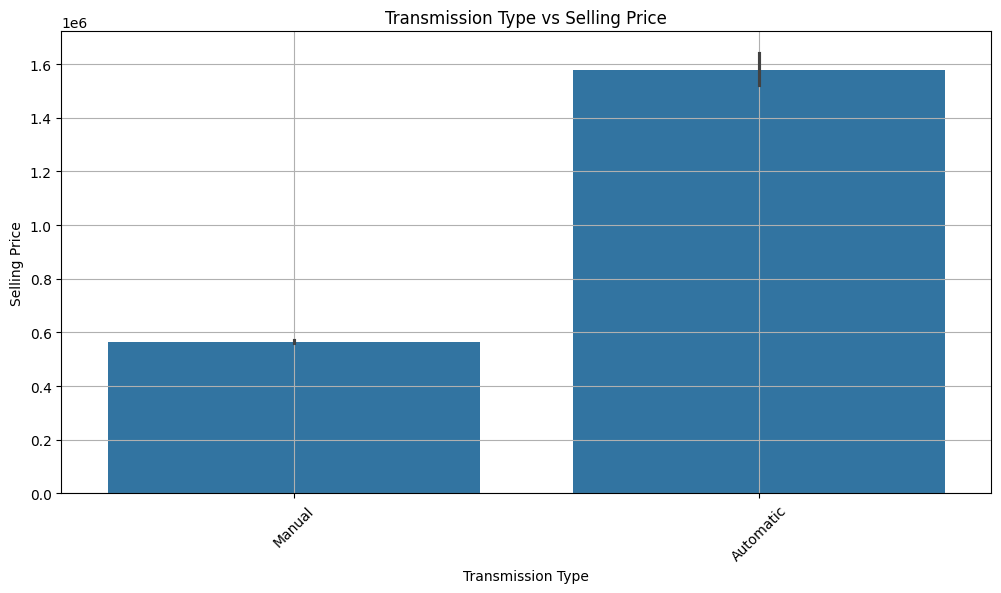

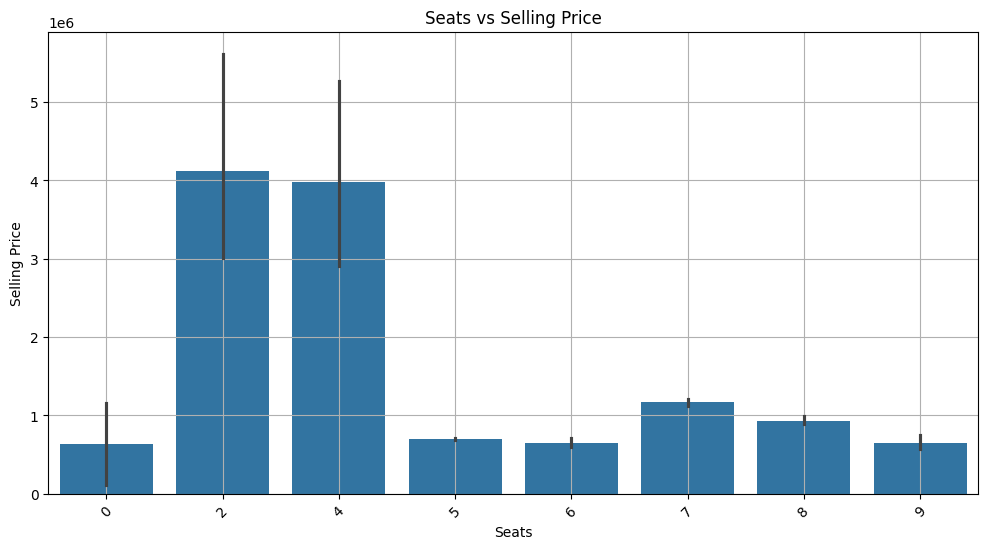

In [32]:
# Categorical vs Numerical
plt.figure(figsize=(12,6))
sns.barplot(x='brand', y='selling_price', data=df)
plt.title('Brand vs Selling Price')
plt.xlabel('Brand')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Or, Violin Plot (for more style)
plt.figure(figsize=(12,6))
sns.violinplot(x ='fuel_type', y='selling_price', data=df)
plt.title('Fuel Type vs Selling Price')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

#Model vs Selling Price
plt.figure(figsize=(12,6))
sns.barplot(x='model', y='selling_price', data=df)
plt.title('Model vs Selling Price')
plt.xlabel('Model')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#Seller Type vs Selling Price
plt.figure(figsize=(12,6))
sns.barplot(x='seller_type', y='selling_price', data=df)
plt.title('Seller Type vs Selling Price')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#Transmisson Type vs Selling Price
plt.figure(figsize=(12,6))
sns.barplot(x='transmission_type', y='selling_price', data=df)
plt.title('Transmission Type vs Selling Price')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#Seats vs Selling Price
plt.figure(figsize=(12,6))
sns.barplot(x='seats', y='selling_price', data=df)
plt.title('Seats vs Selling Price')
plt.xlabel('Seats')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

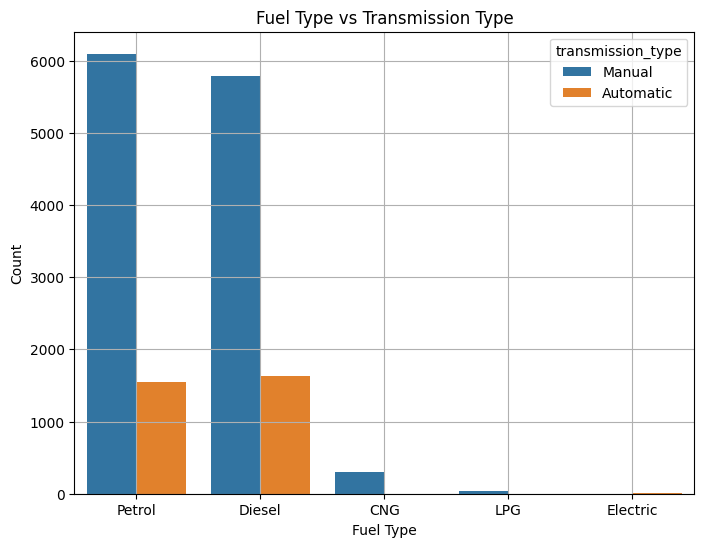

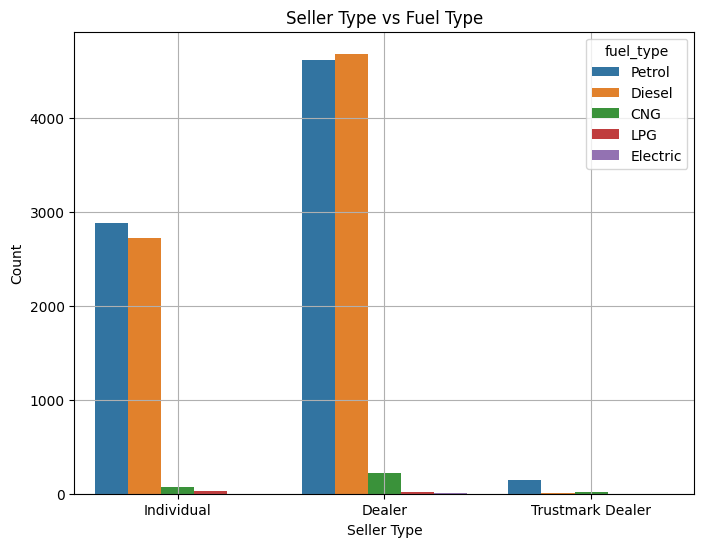

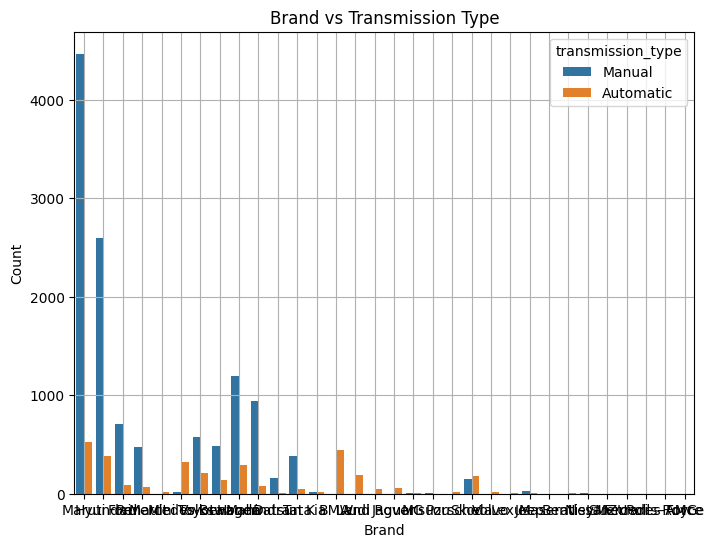

In [33]:
#Categorical vs Categorical 
# fuel_type vs transmission_type
plt.figure(figsize=(8,6))
sns.countplot(x='fuel_type', hue='transmission_type', data=df)
plt.title('Fuel Type vs Transmission Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# seller_type vs fuel_type
plt.figure(figsize=(8,6))
sns.countplot(x='seller_type', hue='fuel_type', data=df)
plt.title('Seller Type vs Fuel Type')
plt.xlabel('Seller Type')
plt.ylabel('Count')
plt.grid(True)
plt.show()

#brand vs transmission_type
plt.figure(figsize=(8,6))
sns.countplot(x='brand', hue='transmission_type', data=df)
plt.title('Brand vs Transmission Type')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.grid(True)
plt.show()

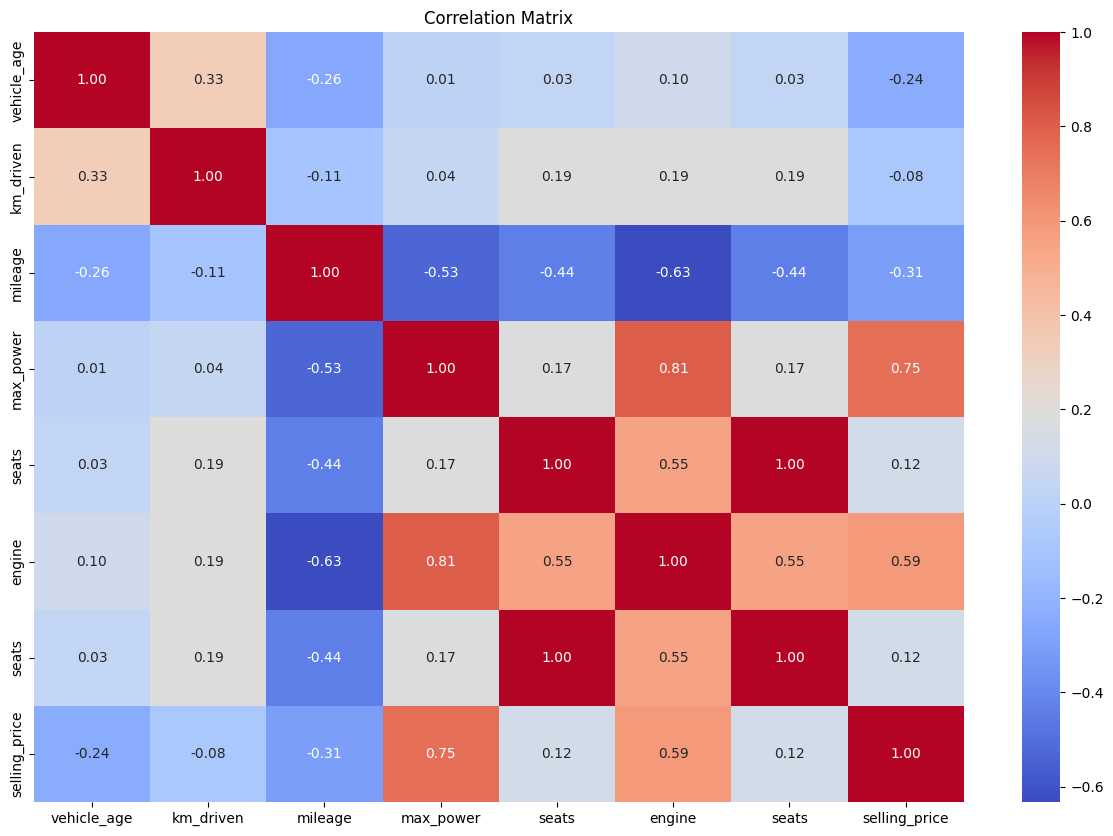

In [45]:
# Correlation heatmap for numerical variables
import pandas as pd
numerical_cols = ['vehicle_age','km_driven','mileage','max_power','seats', 'engine', 'seats','selling_price']
corr = df[numerical_cols].corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
